In [ ]:
# EE183DA - Lab 3
# Tiger group
# Loc Nguyen
# Huu Ngoc Tam Phan
# Tien Doan
# Man I Pang

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2.1a Create State Space
# Define the grid world
L = 6
W = 6
goal = [4,4]

# State s = (x, y, h) including x value, y value and the heading angle h=0:11
# Create State Space with all possible x,y,h
S = []
for x in range(L):
    for y in range(W):
        for h in range(12):
            S.append((x, y, h))
            
# Size of the State Space
Ns = len(S)  
print('Number of state in State Space: %d.' % Ns)

# 2.1a Create State Space
# Define moving actions
NO_MOVE = 0
FW = 1
BW = -1
# Define rotating actions
NO_TURN = 0
LT = -1
RT = 1
# Action a = (move, turn)
A = [];
for move in [NO_MOVE, FW, BW]:
    if move != NO_MOVE:
        for turn in [NO_TURN, LT, RT]:
            A.append((move, turn))
    else:
        A.append((NO_MOVE, NO_TURN))

# Size of the Action Space
Na = len(A)
print('Number of action in Action Space: %d' % Na)

Number of state in State Space: 432.
Number of action in Action Space: 7


In [2]:
# 2.1c Function that return probability psa given pe,s,a,s'
def psa_func(s, a, s_prime, pe=0.0):
    # Probability of not pre_rotate is 1-2pe, so pe <= 0.5
    if (pe > 0.5 or pe < 0):
        raise ValueError('Probability (pe) must be between 0 and 0.5')
    
    # Calculate the moving direction after pre_rotating for 12 cases of heading
    # P_direction[h] = [not pre_rotate,rotate right,rotate left]
    # P_direction[h] = [(h,1-2*pe,[delta_x,delta_y]),(h+1,pe,[delta_x,delta_y]),(h-1,pe,[delta_x,delta_y])] 
    
    P_direction = {}
    
    # function returning the change in direction if go FW with the heading angle h
    def angle2dir(h):
        pos = [0,0]
        if (h == 11 or h == 0 or h == 1): pos[1] = 1
        if (h == 7 or h == 6 or h == 5): pos[1] = -1
        if (h == 2 or h == 3 or h == 4): pos[0] = 1
        if (h == 10 or h == 9 or h == 8): pos[0] = -1
        return pos
    
    for i in range(12):
        P_direction[i]= [(i, 1-2*pe, angle2dir(i)), ((i+1)%12, pe, angle2dir((i+1)%12)), ((i+11)%12, pe, angle2dir((i+11)%12))]
      
    # Calculate all possible furture states and store in P
    P = {}                # P[(x, y, h)] = p_sa 
    if a[0] == FW:
        for direction in P_direction[s[2]]:
            # check if move out of grid then stay still
            xd = s[0] + direction[2][0] if ((s[0] + direction[2][0]<=L-1) and (s[0] + direction[2][0]>=0)) else s[0]
            yd = s[1] + direction[2][1] if ((s[1] + direction[2][1]<=W-1) and (s[1] + direction[2][1]>=0)) else s[1]
            hd = (direction[0] + a[1]) % 12
            P[(xd, yd, hd)] = direction[1]
            
    elif a[0] == BW:        
        for direction in P_direction[s[2]]:
            # check if move out of grid then stay still
            xd = s[0] - direction[2][0] if ((s[0] - direction[2][0]<=L-1) and (s[0] - direction[2][0]>=0)) else s[0]
            yd = s[1] - direction[2][1] if ((s[1] - direction[2][1]<=W-1) and (s[1] - direction[2][1]>=0)) else s[1]
            hd = (direction[0] + a[1]) % 12
            P[(xd, yd, hd)] = direction[1]    
            
    else:
        # NO_MOVE
        P[s] = 1
    
    # Find s_prime is P for psa
    if s_prime in P.keys():
        return P[s_prime]
    else:
        return 0.0

In [3]:
# Test the psa_func(), given s, s' and pe, 
# print all the probability for each action in Action Space to go from s to s'
s = (2,3,0)
s_prime = (2,4,1) 
pe = 0.2
for a in A: 
    p = psa_func(s, a, s_prime,pe) 
    print("Action:",a) 
    print("P: ",p)
    

Action: (0, 0)
P:  0.0
Action: (1, 0)
P:  0.2
Action: (1, -1)
P:  0.0
Action: (1, 1)
P:  0.6
Action: (-1, 0)
P:  0.0
Action: (-1, -1)
P:  0.0
Action: (-1, 1)
P:  0.0


In [4]:
# 2.1d Calculate the next state s' given pe,s,a using psa_func()
# This method is slow because it needs to scan all possible next states (3*3*5=45)
# means calling psa_function 30 times to find the next state
def next_state(s, a, pe = 0.0):
    ns = {}
    # Create Possible Next State Space
    PNS = []
    for x in [s[0]-1,s[0],s[0]+1]:
        for y in [s[1]-1,s[1],s[1]+1]:
            for h in [s[2]-2,s[2]-1,s[2],s[2]+1,s[2]+2]:
                PNS.append((x, y, h))
    for s_prime in PNS:
        p=psa_func(s,a,s_prime,pe)
        if p!=0 :
            ns[(p,s_prime)]=s_prime            
    return ns

In [5]:
# Test the next_state() function
# Print the next_state of the current state (2,2,6) with all the action in Action Space
s = (1,4,6)
for a in A: 
    ns = next_state(s, a,0.3) 
    print("action:",a) 
    print(list(ns.keys()))

action: (0, 0)
[(1, (1, 4, 6))]
action: (1, 0)
[(0.3, (1, 3, 5)), (0.4, (1, 3, 6)), (0.3, (1, 3, 7))]
action: (1, -1)
[(0.3, (1, 3, 4)), (0.4, (1, 3, 5)), (0.3, (1, 3, 6))]
action: (1, 1)
[(0.3, (1, 3, 6)), (0.4, (1, 3, 7)), (0.3, (1, 3, 8))]
action: (-1, 0)
[(0.3, (1, 5, 5)), (0.4, (1, 5, 6)), (0.3, (1, 5, 7))]
action: (-1, -1)
[(0.3, (1, 5, 4)), (0.4, (1, 5, 5)), (0.3, (1, 5, 6))]
action: (-1, 1)
[(0.3, (1, 5, 6)), (0.4, (1, 5, 7)), (0.3, (1, 5, 8))]


In [6]:
# 2.1d' Calculate the next state s' given pe,s,a
# This method is much faster, same time for 1 psa_func()
# 30 times faster than the previous method
def fnext_state(s, a, pe = 0.0):
    # Probability of not pre_rotate is 1-2pe, so pe <= 0.5
    if (pe > 0.5 or pe < 0):
        raise ValueError('Probability (pe) must be between 0 and 0.5')
    
    # Calculate the moving direction after pre_rotating for 12 cases of heading
    # P_direction[h] = [not pre_rotate,rotate right,rotate left]
    # P_direction[h] = [(h,1-2*pe,[delta_x,delta_y]),(h+1,pe,[delta_x,delta_y]),(h-1,pe,[delta_x,delta_y])] 
    
    # function returning the changing in direction if go FW with the heading angle h
    def angle2dir(h):
        pos = [0,0]
        if (h == 11 or h == 0 or h == 1): pos[1] = 1
        if (h == 7 or h == 6 or h == 5): pos[1] = -1
        if (h == 2 or h == 3 or h == 4): pos[0] = 1
        if (h == 10 or h == 9 or h == 8): pos[0] = -1
        return pos
    
    P_direction = {}
    for i in range(12):
        P_direction[i]= [(i, 1-2*pe, angle2dir(i)), ((i+1)%12, pe, angle2dir((i+1)%12)), ((i+11)%12, pe, angle2dir((i+11)%12))]
        
    # Calculate all possible furture states and store in P
    P = {}                # P[psa] = s' 
    if a[0] == FW:
        for direction in P_direction[s[2]]:
            # check if move out of grid then stay still
            xd = s[0] + direction[2][0] if ((s[0] + direction[2][0]<=L-1) and (s[0] + direction[2][0]>=0)) else s[0]
            yd = s[1] + direction[2][1] if ((s[1] + direction[2][1]<=W-1) and (s[1] + direction[2][1]>=0)) else s[1]
            hd = (direction[0] + a[1]) % 12
            if direction[1]!=0:
                P[(direction[1],(xd, yd, hd))] = (xd, yd, hd) 
            
            
    elif a[0] == BW:        
        for direction in P_direction[s[2]]:
            # check if move out of grid then stay still
            xd = s[0] - direction[2][0] if ((s[0] - direction[2][0]<=L-1) and (s[0] - direction[2][0]>=0)) else s[0]
            yd = s[1] - direction[2][1] if ((s[1] - direction[2][1]<=W-1) and (s[1] - direction[2][1]>=0)) else s[1]
            hd = (direction[0] + a[1]) % 12
            if direction[1] !=0.0:
                P[(direction[1],(xd, yd, hd))] = (xd, yd, hd)
            
    else:
        # NO_MOVE
        P[(1.0, s)] = s
    # return all the possible s'
    return P

In [7]:
# Test the fnext_state() function
# Print the next_state of the current state (2,2,6) with all the action in Action Space
s = (1,4,6)
for a in A: 
    ns = fnext_state(s, a, 0.3) 
    print("action:",a)     
    print(list(ns.keys()))

action: (0, 0)
[(1.0, (1, 4, 6))]
action: (1, 0)
[(0.4, (1, 3, 6)), (0.3, (1, 3, 7)), (0.3, (1, 3, 5))]
action: (1, -1)
[(0.4, (1, 3, 5)), (0.3, (1, 3, 6)), (0.3, (1, 3, 4))]
action: (1, 1)
[(0.4, (1, 3, 7)), (0.3, (1, 3, 8)), (0.3, (1, 3, 6))]
action: (-1, 0)
[(0.4, (1, 5, 6)), (0.3, (1, 5, 7)), (0.3, (1, 5, 5))]
action: (-1, -1)
[(0.4, (1, 5, 5)), (0.3, (1, 5, 6)), (0.3, (1, 5, 4))]
action: (-1, 1)
[(0.4, (1, 5, 7)), (0.3, (1, 5, 8)), (0.3, (1, 5, 6))]


In [8]:
# 2.2a reward function
def reward(s):
    # Build reward map
    R_map = [(-100,-100,-100,-100,-100,-100),
             (-100,0   ,0   ,-10 , 1  ,-100),
             (-100,0   ,0   ,-10 , 0  ,-100),
             (-100,0   ,0   ,0   , 0  ,-100),
             (-100,0   ,0   ,0   , 0  ,-100),
             (-100,-100,-100,-100,-100,-100)]
    return R_map[W-s[1]-1][s[0]]

In [9]:
# 2.3a Array of action prescribed by the initial policy
# Start with an initial policy
def init_policy():
    policy = {}    
    for s in S:
        # Vector from current state to the goal
        dir_vector = [goal[0] - s[0], goal[1] - s[1]]
    
        # dir_vector = [0,0] means it has reached the goal
        if dir_vector == [0, 0]:
            policy[s] = (NO_MOVE, NO_TURN)
        
        # Calculate for moving direction
        # +y direction
        if s[2] in [11, 0, 1]:
            move = FW if (dir_vector[1]>=0 or dir_vector[0]==0) else BW
        # -y direction
        if s[2] in [5, 6, 7]:
            move = FW if (dir_vector[1]<=0 or dir_vector[0]==0) else BW
        # +x direction
        if s[2] in [2, 3, 4]:
            move = FW if (dir_vector[0]>=0 or dir_vector[1]==0) else BW
        # -x direction
        if s[2] in [8, 9, 10]:
            move = FW if (dir_vector[0]<=0 or dir_vector[1]==0) else BW
        
    
        # Calculate turning angle
        # angle of direction vector from current state to goal
        th = np.arctan2(dir_vector[1], dir_vector[0])*180/np.pi
        # different between current state heading to the direction vector
        thd = s[2]*30-(90 - th)
        if (thd > 0) and (thd < 180):
            turn = LT
        elif (thd == 0) or (thd == 180):
            turn = NO_TURN
        else:
            turn = RT
        
        policy[s] = (move, turn)
    return policy

policy = init_policy()

In [10]:
# 2.3b Function that generate and plot a trajectory of robot
# given initial policy, initial state, and pe
def trajectory(i_policy, i_s, goal, pe=0.0):
    # Probability of not pre_rotate is 1-2pe, so pe <= 0.5
    if (pe > 0.5 or pe < 0):
        raise ValueError('Probability (pe) must be between 0 and 0.5')
        
    # Generate the trajectory
    traj = []
    curr_s = i_s
    while True:
        traj.append([curr_s, i_policy[curr_s]])
        if (i_policy[curr_s] == (0, 0)):
            break
        if (curr_s[0] == goal[0]) and (curr_s[1] == goal[1]):
            break
        P_ns = fnext_state(curr_s, i_policy[curr_s], pe)
        # find the best next state to go
        best_s = max(P_ns.keys())
        curr_s = P_ns[best_s]
        
    # Draw grid map
    fig = plt.figure(figsize = (L,W))
    ax = fig.add_subplot(1,1,1)
    plt.xlim((0, L))
    plt.ylim((0, W))
    plt.grid(True, color = 'k')

    # Plot red markers at edges
    edge1 = plt.Rectangle((0,0), 1, 6, color = 'r')
    edge2 = plt.Rectangle((1,0), 5, 1, color = 'r')
    edge3 = plt.Rectangle((5,1), 1, 5, color = 'r')
    edge4 = plt.Rectangle((1,5), 4, 1, color = 'r')
    ax.add_patch(edge1)
    ax.add_patch(edge2)
    ax.add_patch(edge3)
    ax.add_patch(edge4)

    # Plot yellow markers
    yellow = plt.Rectangle((3,3), 1, 2, color = 'y')
    ax.add_patch(yellow)
    
    # Plot green goal
    goal = plt.Rectangle((4,4), 1, 1, color = 'g')
    ax.add_patch(goal)
        
    # Plot the start state
    plt.plot(i_s[0]+0.5, i_s[1]+0.5, 'o', markersize = '10')
    ax.arrow(i_s[0]+0.5, i_s[1]+0.5, 0.4*np.sin(30*i_s[2]*np.pi/180),0.4*np.cos(30*i_s[2]*np.pi/180), \
             head_width = 0.1, head_length = 0.2, fc = 'k', ec = 'k')
    
    # Plot all passing states
    for i in range(1, len(traj)):
        x1 = traj[i-1][0][0]
        y1 = traj[i-1][0][1]
        x2 = traj[i][0][0]
        y2 = traj[i][0][1]
        h = traj[i][0][2]
        plt.plot([x1+0.5, x2+0.5], [y1+0.5, y2+0.5], 'k--')
        plt.plot(x2+0.5, y2+0.5, 'o', markersize = '10')
        ax.arrow(x2+0.5, y2+0.5, 0.4*np.sin(30*h*np.pi/180),0.4*np.cos(30*h*np.pi/180), \
                 head_width = 0.1, head_length = 0.2, fc = 'k', ec = 'k')
    
    plt.show()
    return traj
    

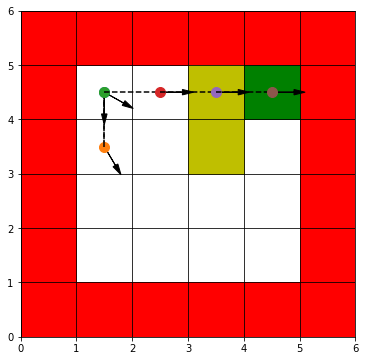

Trajectory (state, action) from (1, 4, 6) to [4, 4] is:  [[(1, 4, 6), (1, -1)], [(1, 3, 5), (-1, -1)], [(1, 4, 4), (1, -1)], [(2, 4, 3), (1, 0)], [(3, 4, 3), (1, 0)], [(4, 4, 3), (1, 0)]]


In [11]:
# 2.3c Plot trajectory starting at x=1,y=4,h=6, pe=0
s0 = (1, 4, 6)
policy = init_policy()
result = trajectory(policy, s0, goal, pe=0.0)
print("Trajectory (state, action) from", str(s0), "to", str(goal),'is: ', result)

In [12]:
# 2.3d Policy evaluation
# evaluation will stop when the value function is less than theta
# return {S: V} representing the value function.
def policy_eval(policy, reward_f, pe, discount_factor, accuracy=0.01):
    
    # Initial with all 0 value in V
    V = {}
    for s in S:
        V[s] = 0.0
    
    while True:
        delta = 0
        # evaluation for each state
        for s in S:
            v = 0
            # List all posible next state and probabilites in P_ns
            P_ns = fnext_state(s, policy[s], pe)
            for key in P_ns.keys():
                # Calculate the expected value
                ns = P_ns[key]                
                v = v + list(key)[0] * (reward_f(ns) + discount_factor * V[ns])
            # Changing value of V[s]
            delta = max(delta, np.abs(v - V[s]))
            V[s] = v
        # Stop evaluating if changing less than theta
        if delta < accuracy:
            break
    return V

In [13]:
# 2.3e Trajectory starting at x=1,y=4,h=6, pe=0 with discount_factor = 0.9
pe = 0
discount_factor=0.9
accuracy = 0.001
V = policy_eval(policy,reward, pe, discount_factor, accuracy)
s0=(1,4,6)
print("The value V[(%s)] is:" % str(s0), V[s0])

The value V[((1, 4, 6))] is: -597.1163982764241


In [14]:
# 2.3f Function to calculate an optimal policy, given V, reward function, pe, discount_factor
# return optimal policy by one step lookahead
# complexity Ns*Na
def one_step_optimal(V, reward_f, pe, discount_factor):    
    policy = {}
    # scan all states in state space
    for s in S:
        action_values = np.zeros(Na)
        # Look at one step ahead for possible next actions
        for i, a in enumerate(A): # i: index number, a: (move, turn)
            # List all possible next states
            P_ns = fnext_state(s, a, pe)
            for key in P_ns.keys():
                ns = P_ns[key]
                # Expected value
                action_values[i] += list(key)[0] * (reward_f(ns) + discount_factor * V[ns])                
                
        # Find the best action
        best_action = np.argmax(action_values)
        policy[s] = A[best_action]        
    return policy

In [15]:
# 2.3g Policy Iteration Algorithm
# given initial policy, reward function, pe, discount_factor
# return policy and optimal value
# note that this function have complexity of (# of iteration)*Na*Ns^2 (the times call next_state() function)
# the speed of calculation is depent a lot in how fast you calculate for next state.
def p_iter(policy, reward_f, pe, discount_factor):
    while True:
        # Evaluate the current policy
        V = policy_eval(policy, reward_f, pe, discount_factor)
        # Update policy using one_step_optimal function
        policy_new = one_step_optimal(V, reward_f, pe, discount_factor)
        # if new policy != old policy, continue iterate policy
        # if they are equal means we have found optimal policy, get out of iteration
        if policy_new != policy:
            policy = policy_new
        else:
            return policy, V        
        

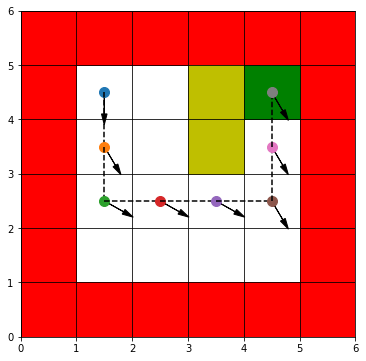

Trajectory from (1, 4, 6) to the [4, 4] is:  [[(1, 4, 6), (1, -1)], [(1, 3, 5), (1, -1)], [(1, 2, 4), (1, 0)], [(2, 2, 4), (1, 0)], [(3, 2, 4), (1, 1)], [(4, 2, 5), (-1, 0)], [(4, 3, 5), (-1, 0)], [(4, 4, 5), (0, 0)]]
Iteration time = 8.7440824508667 s


In [16]:
# 2.3h and 2.3i 
import time

# Compute the optimal policy
start_time = time.time()
policy = init_policy()
policy_optimal, V_optimal = p_iter(policy, reward, 0.0, 0.9)

# plot the trajectory with optimal policy
s0 = (1, 4, 6)
traj = trajectory(policy_optimal, s0, goal, 0.0)
end_time = time.time()
print("Trajectory from %s to the %s is: " %(str(s0), str(goal)), traj)
print("Iteration time = %s s" %str(end_time - start_time))

In [17]:
# 2.4a Value iteration with initial condition V(s)=0
# the time calling next_state() function is Ns*Na*(# of iteration) faster than (Ns^2*(# of iteration) in 2.3g)
def value_iter(policy, reward_f, pe, discount_factor, accuracy=0.01):
    # Start with initial condition V(s)=0
    V = {}
    for s in S:
        V[s] = 0.0
        
    while True:
        delta = 0
        # Scan all state in State Space
        for s in S:
            action_values = np.zeros(Na)
            # Look at the possible next actions
            for i, a in enumerate(A):
                # List all possible next states
                P_ns = fnext_state(s, a, pe)
                for key in P_ns.keys():
                    ns = P_ns[key]
                    # Calculate the action value
                    action_values[i] += list(key)[0] * (reward_f(ns) + discount_factor * V[ns])
            # Best one-step lookahead 
            best_action_value = np.max(action_values)
            best_action = np.argmax(action_values)
            policy[s] = A[best_action] 

            # Calculate delta
            delta = max(delta, np.abs(best_action_value - V[s]))
            # Update the value function
            V[s] = best_action_value

        # stop condition
        if delta < accuracy:
            break
    return policy, V

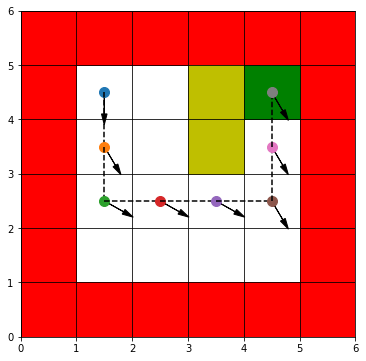

Trajectory from (1, 4, 6) to the [4, 4] is:  [[(1, 4, 6), (1, -1)], [(1, 3, 5), (1, -1)], [(1, 2, 4), (1, 0)], [(2, 2, 4), (1, 0)], [(3, 2, 4), (1, 1)], [(4, 2, 5), (-1, 0)], [(4, 3, 5), (-1, 0)], [(4, 4, 5), (0, 0)]]
Iteration time = 4.765152931213379 s


In [18]:
# 2.4b and 2.4c 
import time

# Compute the optimal policy
start_time = time.time()
policy = init_policy()
policy_optimal, V_optimal = value_iter(policy, reward, 0.0, 0.9)

# plot the trajectory with optimal policy
s0 = (1, 4, 6)
traj = trajectory(policy_optimal, s0, goal, 0.0)
end_time = time.time()
print("Trajectory from %s to the %s is: " %(str(s0), str(goal)), traj)
print("Iteration time = %s s" %str(end_time - start_time))

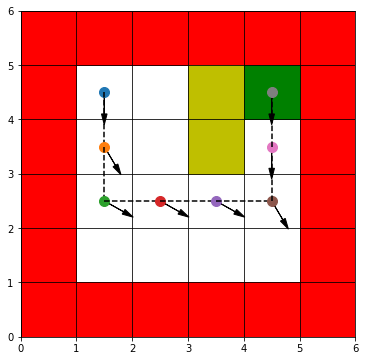

Trajectory from (1, 4, 6) to the [4, 4] is:  [[(1, 4, 6), (1, -1)], [(1, 3, 5), (1, -1)], [(1, 2, 4), (1, 0)], [(2, 2, 4), (1, 0)], [(3, 2, 4), (1, 1)], [(4, 2, 5), (-1, 1)], [(4, 3, 6), (-1, 0)], [(4, 4, 6), (0, 0)]]


In [19]:
# 2.5a Plot trajectory starting at x=1,y=4,h=6, pe=0.1
# Compute optimal policy with pe=0.1
policy = init_policy()
policy_optimal, V_optimal = value_iter(policy, reward, pe = 0.1, discount_factor = 0.9)

# plot the trajectory with optimal policy
s0 = (1, 4, 6)
traj = trajectory(policy_optimal, s0, goal, 0.1)
print("Trajectory from %s to the %s is: " %(str(s0), str(goal)), traj)

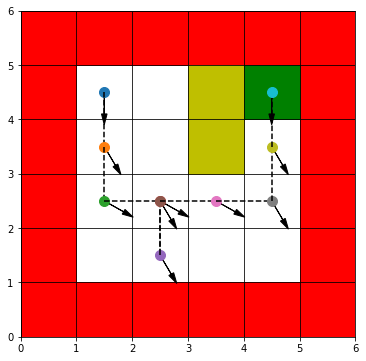

Trajectory from (1, 4, 6) to the [4, 4] is:  [[(1, 4, 6), (1, -1)], [(1, 3, 5), (1, -1)], [(1, 2, 4), (1, 1)], [(2, 2, 5), (1, 0)], [(2, 1, 5), (-1, -1)], [(2, 2, 4), (1, 0)], [(3, 2, 4), (1, 1)], [(4, 2, 5), (-1, 0)], [(4, 3, 5), (-1, 1)], [(4, 4, 6), (0, 0)]]


In [21]:
# 2.5b Modify the reward function that just only reward 1 at the goal 4,4 with direction 5,6,7, otherwise zero
# Recompute 2.3c with new reward function and pe=0.25
# New reward function
def reward2(s):
    # Build reward map
    R_map = [(-100,-100,-100,-100,-100,-100),
             (-100,0   ,0   ,-10 , 0  ,-100),
             (-100,0   ,0   ,-10 , 0  ,-100),
             (-100,0   ,0   ,0   , 0  ,-100),
             (-100,0   ,0   ,0   , 0  ,-100),
             (-100,-100,-100,-100,-100,-100)]
    if (s[0] == 4) and (s[1] == 4) and (s[2] == 6):
        return 1;
    return R_map[W-s[1]-1][s[0]]

# Compute optimal policy with pe=0.25
policy = init_policy()
policy_optimal, V_optimal = value_iter(policy, reward2, pe = 0.25, discount_factor = 0.9)

# plot the trajectory with optimal policy
s0 = (1, 4, 6)
traj = trajectory(policy_optimal, s0, goal, 0.25)
print("Trajectory from %s to the %s is: " %(str(s0), str(goal)), traj)